In [1]:
library('ggplot2')
library('openxlsx')  
library('ggpubr')
library('dplyr')


载入程辑包：‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# Figure 2A/2E

In [2]:
MDP_scores = as.matrix(read.table("./Input/03_MDP_sample_scores.tsv", sep = "\t", header = TRUE))
MDP_scores = MDP_scores[order(as.numeric(MDP_scores[, 7])), ]
MDP_scores

allgenes.Sample,allgenes.Score,allgenes.Class,allgenes.zscore_class,allgenes.outlier,perturbedgenes.Sample,perturbedgenes.Score,perturbedgenes.Class,perturbedgenes.zscore_class,perturbedgenes.outlier
X01_train_nonPTB_Negative_Philippines.7,0.38890398,non-PTB,-0.064183292,0,X01_train_nonPTB_Negative_Philippines.7,0.04560400,non-PTB,-0.67318828,0
X01_train_nonPTB_Negative_Uganda.15,0.48886852,non-PTB,0.385812033,0,X01_train_nonPTB_Negative_Uganda.15,0.04742031,non-PTB,-0.66812300,0
X01_train_PTB_Negative_Philippines.3,0.11397268,PTB,-0.933475062,0,X01_train_PTB_Negative_Philippines.3,0.06109950,PTB,-0.74942669,0
X01_train_nonPTB_Negative_Uganda.9,0.16613504,non-PTB,-1.066988724,0,X01_train_nonPTB_Negative_Uganda.9,0.06337016,non-PTB,-0.62364228,0
X01_train_nonPTB_Negative_Uganda.21,0.24356975,non-PTB,-0.718412539,0,X01_train_nonPTB_Negative_Uganda.21,0.06509256,non-PTB,-0.61883887,0
X01_train_nonPTB_Negative_Philippines.2,0.10012577,non-PTB,-1.364132727,0,X01_train_nonPTB_Negative_Philippines.2,0.07175101,non-PTB,-0.60026989,0
X01_train_nonPTB_Positive_Uganda.6,0.41516138,non-PTB,0.054015682,0,X01_train_nonPTB_Positive_Uganda.6,0.07763995,non-PTB,-0.58384692,0
X01_train_nonPTB_Negative_Uganda.12,0.59403467,non-PTB,0.859222660,0,X01_train_nonPTB_Negative_Uganda.12,0.07908136,non-PTB,-0.57982713,0
X01_train_nonPTB_Negative_Vietnam.5,0.55841411,non-PTB,0.698874955,0,X01_train_nonPTB_Negative_Vietnam.5,0.08218057,non-PTB,-0.57118409,0
X01_train_nonPTB_Negative_Uganda.20,0.54788762,non-PTB,0.651489454,0,X01_train_nonPTB_Negative_Uganda.20,0.08609328,non-PTB,-0.56027240,0


In [3]:
category = MDP_scores[, 6]
values = as.numeric(MDP_scores[, 7])
color_var = as.factor(MDP_scores[, 8])
plot_data = data.frame(Category = factor(category, levels = unique(category)), Value = values, Color = color_var)

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


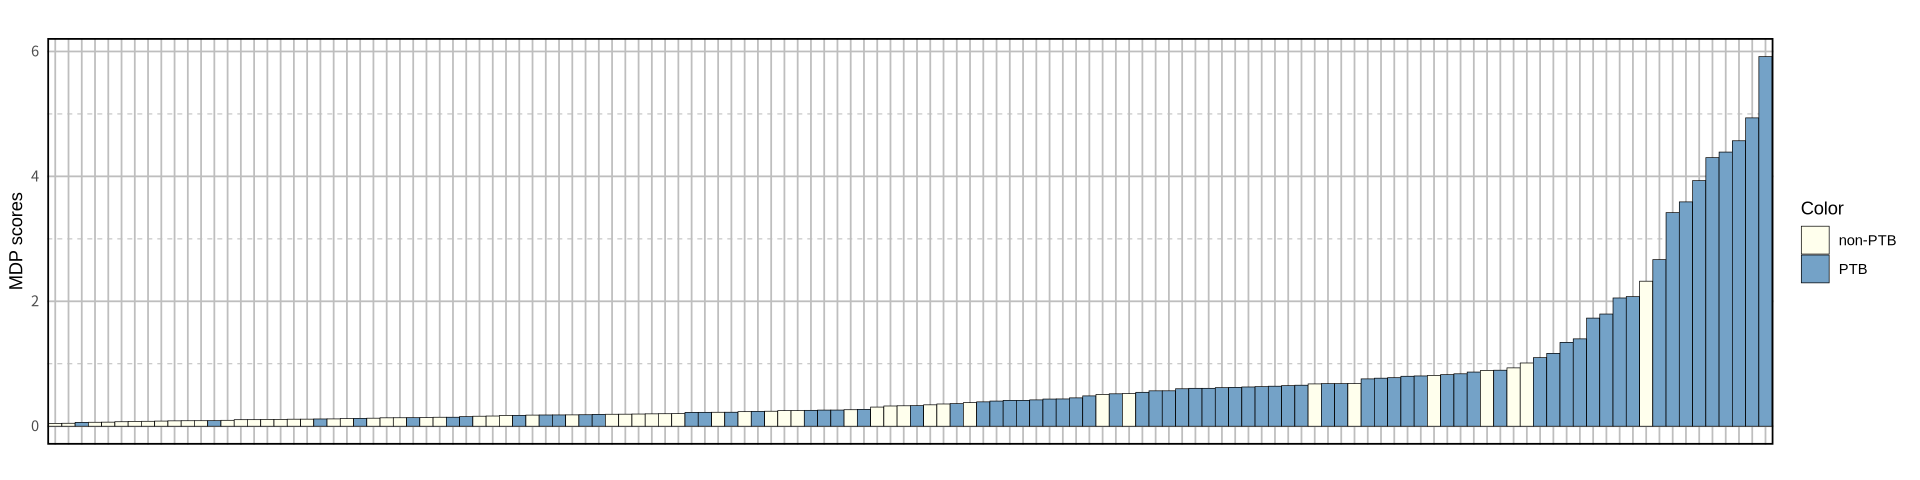

In [4]:
options(repr.plot.width = 16, repr.plot.height = 4) 
p = ggplot(plot_data, aes(x = Category, y = Value, fill = Color)) +
  geom_bar(stat = "identity", color = "black", size = 0.2, width = 1) +
    scale_fill_manual(values = c("non-PTB" = "#FFFFED", "PTB" = "#74A2C7")) +
  labs(title = "", x = "", y = "MDP scores") +
  theme_minimal() +
  theme(
    panel.grid = element_blank(),
    panel.grid.major = element_line(color = "grey", size = 0.5), 
    panel.grid.minor = element_line(color = "grey", size = 0.3, linetype = "dashed"), 
    axis.text.x = element_blank(), 
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1)
  ) 
p
ggsave("./Output/03_MDP_scores_bar_plot.pdf", plot = p, width = 16, height = 4, dpi = 300)

# Figure 2B/2F

In [5]:
MDP_scores = as.data.frame(read.table("./Input/03_MDP_sample_scores.tsv", sep = "\t", header = TRUE))
MDP_scores

allgenes.Sample,allgenes.Score,allgenes.Class,allgenes.zscore_class,allgenes.outlier,perturbedgenes.Sample,perturbedgenes.Score,perturbedgenes.Class,perturbedgenes.zscore_class,perturbedgenes.outlier
<chr>,<dbl>,<chr>,<dbl>,<int>,<chr>,<dbl>,<chr>,<dbl>,<int>
X01_train_nonPTB_Negative_Uganda,0.4983765,non-PTB,0.428612792,0,X01_train_nonPTB_Negative_Uganda,0.32377514,non-PTB,0.10257118,0
X01_train_nonPTB_Negative_Uganda.1,0.9879632,non-PTB,2.632511499,1,X01_train_nonPTB_Negative_Uganda.1,0.68386411,non-PTB,1.10678185,0
X01_train_nonPTB_Negative_Uganda.2,0.5277066,non-PTB,0.560643629,0,X01_train_nonPTB_Negative_Uganda.2,0.12843610,non-PTB,-0.44218737,0
X01_train_nonPTB_Negative_Uganda.3,0.5075084,non-PTB,0.469720341,0,X01_train_nonPTB_Negative_Uganda.3,0.19805733,non-PTB,-0.24802874,0
X01_train_nonPTB_Negative_Uganda.4,0.5576470,non-PTB,0.695421602,0,X01_train_nonPTB_Negative_Uganda.4,0.09471776,non-PTB,-0.53622056,0
X01_train_nonPTB_Negative_Uganda.5,0.3876749,non-PTB,-0.069715965,0,X01_train_nonPTB_Negative_Uganda.5,0.34254137,non-PTB,0.15490616,0
X01_train_nonPTB_Positive_Uganda,0.4013978,non-PTB,-0.007941723,0,X01_train_nonPTB_Positive_Uganda,0.17230906,non-PTB,-0.31983514,0
X01_train_nonPTB_Negative_Vietnam,0.2335743,non-PTB,-0.763407474,0,X01_train_nonPTB_Negative_Vietnam,0.24942184,non-PTB,-0.10478418,0
X01_train_nonPTB_Negative_Vietnam.1,0.6655184,non-PTB,1.181010034,0,X01_train_nonPTB_Negative_Vietnam.1,0.19499642,non-PTB,-0.25656495,0


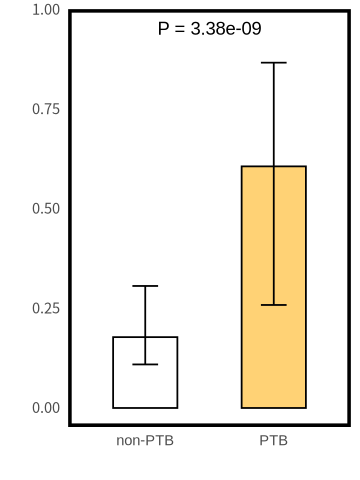

In [6]:
options(repr.plot.width = 3, repr.plot.height = 4) 

# Calculate median and interquartile range (IQR) for each group
summary_data = MDP_scores %>%
  group_by(perturbedgenes.Class) %>%
  summarise(
    Median = median(perturbedgenes.Score),
    Q1 = quantile(perturbedgenes.Score, 0.25),
    Q3 = quantile(perturbedgenes.Score, 0.75)
  )

# Generate bar plots for group comparison
p = ggplot(summary_data, aes(x = perturbedgenes.Class, y = Median, fill = perturbedgenes.Class)) +
  geom_bar(stat = "identity", color = "black", width = 0.5) +
  geom_errorbar(aes(ymin = Q1, ymax = Q3), width = 0.2, color = "black") +
  scale_fill_manual(values = c("#ffffff", "#ffd275")) +
  labs(y = "", x = "") +
  theme_minimal() +
  theme(legend.position = "none", 
        panel.border = element_rect(color = "black", fill = NA, linewidth = 2),  
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank())

# Perform Wilcoxon rank-sum test
wilcox_test = wilcox.test(perturbedgenes.Score ~ perturbedgenes.Class, data = MDP_scores)
p_value = wilcox_test$p.value

# Add statistical significance annotations to plots
p + annotate("text", x = 1.5, y = max(summary_data$Q3) * 1.1, label = paste0("P = ", signif(p_value, 3)))

ggsave("./Output/04_MDP_scores_bar_plot.pdf", plot = p, width = 6, height = 6, dpi = 300)

# Figure 2C/2G

In [7]:
MDP_scores = as.data.frame(read.table("./Input/03_MDP_sample_scores.tsv", sep = "\t", header = TRUE))
MDP_scores 

allgenes.Sample,allgenes.Score,allgenes.Class,allgenes.zscore_class,allgenes.outlier,perturbedgenes.Sample,perturbedgenes.Score,perturbedgenes.Class,perturbedgenes.zscore_class,perturbedgenes.outlier
<chr>,<dbl>,<chr>,<dbl>,<int>,<chr>,<dbl>,<chr>,<dbl>,<int>
X01_train_nonPTB_Negative_Uganda,0.4983765,non-PTB,0.428612792,0,X01_train_nonPTB_Negative_Uganda,0.32377514,non-PTB,0.10257118,0
X01_train_nonPTB_Negative_Uganda.1,0.9879632,non-PTB,2.632511499,1,X01_train_nonPTB_Negative_Uganda.1,0.68386411,non-PTB,1.10678185,0
X01_train_nonPTB_Negative_Uganda.2,0.5277066,non-PTB,0.560643629,0,X01_train_nonPTB_Negative_Uganda.2,0.12843610,non-PTB,-0.44218737,0
X01_train_nonPTB_Negative_Uganda.3,0.5075084,non-PTB,0.469720341,0,X01_train_nonPTB_Negative_Uganda.3,0.19805733,non-PTB,-0.24802874,0
X01_train_nonPTB_Negative_Uganda.4,0.5576470,non-PTB,0.695421602,0,X01_train_nonPTB_Negative_Uganda.4,0.09471776,non-PTB,-0.53622056,0
X01_train_nonPTB_Negative_Uganda.5,0.3876749,non-PTB,-0.069715965,0,X01_train_nonPTB_Negative_Uganda.5,0.34254137,non-PTB,0.15490616,0
X01_train_nonPTB_Positive_Uganda,0.4013978,non-PTB,-0.007941723,0,X01_train_nonPTB_Positive_Uganda,0.17230906,non-PTB,-0.31983514,0
X01_train_nonPTB_Negative_Vietnam,0.2335743,non-PTB,-0.763407474,0,X01_train_nonPTB_Negative_Vietnam,0.24942184,non-PTB,-0.10478418,0
X01_train_nonPTB_Negative_Vietnam.1,0.6655184,non-PTB,1.181010034,0,X01_train_nonPTB_Negative_Vietnam.1,0.19499642,non-PTB,-0.25656495,0


In [8]:
# Import semi-quantitative data
train_infor = read.xlsx('./Input/04_GSE255071_series_matrix.xlsx', sheet = 2) 
train_infor = as.matrix(train_infor)

# Extract column names for alignment with MDP_scores
data = read.table("./Input/05_GSE255071_colnames.txt", header = TRUE, sep = "\t") 
column_names = colnames(data)
train_infor = cbind(train_infor, column_names)

# Merge data matrices
train_infor = train_infor[match(MDP_scores[,1], train_infor[,14]), ]
train_infor = as.matrix(train_infor)

# Integrate semi-quantitative metadata into MDP_scores
MDP_scores$semiquant = train_infor[,"semiquant"]

# Data filtering
MDP_scores = MDP_scores %>% filter(semiquant != "NA")
MDP_scores

allgenes.Sample,allgenes.Score,allgenes.Class,allgenes.zscore_class,allgenes.outlier,perturbedgenes.Sample,perturbedgenes.Score,perturbedgenes.Class,perturbedgenes.zscore_class,perturbedgenes.outlier,semiquant
<chr>,<dbl>,<chr>,<dbl>,<int>,<chr>,<dbl>,<chr>,<dbl>,<int>,<chr>
X01_train_nonPTB_Negative_Uganda,0.4983765,non-PTB,0.428612792,0,X01_train_nonPTB_Negative_Uganda,0.32377514,non-PTB,0.10257118,0,Negative
X01_train_nonPTB_Negative_Uganda.1,0.9879632,non-PTB,2.632511499,1,X01_train_nonPTB_Negative_Uganda.1,0.68386411,non-PTB,1.10678185,0,Negative
X01_train_nonPTB_Negative_Uganda.2,0.5277066,non-PTB,0.560643629,0,X01_train_nonPTB_Negative_Uganda.2,0.12843610,non-PTB,-0.44218737,0,Negative
X01_train_nonPTB_Negative_Uganda.3,0.5075084,non-PTB,0.469720341,0,X01_train_nonPTB_Negative_Uganda.3,0.19805733,non-PTB,-0.24802874,0,Negative
X01_train_nonPTB_Negative_Uganda.4,0.5576470,non-PTB,0.695421602,0,X01_train_nonPTB_Negative_Uganda.4,0.09471776,non-PTB,-0.53622056,0,Negative
X01_train_nonPTB_Negative_Uganda.5,0.3876749,non-PTB,-0.069715965,0,X01_train_nonPTB_Negative_Uganda.5,0.34254137,non-PTB,0.15490616,0,Negative
X01_train_nonPTB_Positive_Uganda,0.4013978,non-PTB,-0.007941723,0,X01_train_nonPTB_Positive_Uganda,0.17230906,non-PTB,-0.31983514,0,Negative
X01_train_nonPTB_Negative_Vietnam,0.2335743,non-PTB,-0.763407474,0,X01_train_nonPTB_Negative_Vietnam,0.24942184,non-PTB,-0.10478418,0,Negative
X01_train_nonPTB_Negative_Vietnam.1,0.6655184,non-PTB,1.181010034,0,X01_train_nonPTB_Negative_Vietnam.1,0.19499642,non-PTB,-0.25656495,0,Negative


Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


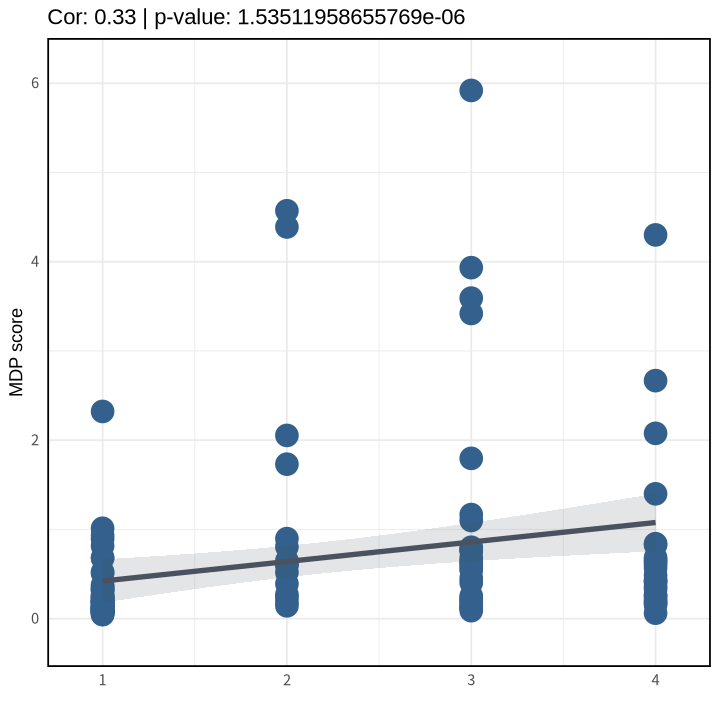

In [9]:
options(repr.plot.width = 6, repr.plot.height = 6) 

Score = as.numeric(MDP_scores[,"perturbedgenes.Score"])
semiquant = MDP_scores[,"semiquant"]

# Convert semiquantitative data to factors and specify levels
semiquant = factor(semiquant, levels = c("Negative", "Low", "Medium", "High"))
semiquant = as.numeric(semiquant)

df = data.frame(Category = semiquant, Value = Score)

# Calculate Spearman’s rank correlation coefficients and p-values
cor_test_result = cor.test(semiquant, Score, method = "kendall")
spearman_correlation = cor_test_result$estimate
p_value = cor_test_result$p.value

p = ggplot(df, aes(x = Category, y = Value)) +
  geom_point(color = "#33608C", size = 6) +
  geom_smooth(method = "lm", color = "#49525E", size = 1.5, se = TRUE, fill = "#49525E", alpha = 0.15) +  
  labs(title = paste("Cor:", round(spearman_correlation, 2), "| p-value:", p_value),
       x = "", y = "MDP score") + 
  theme_minimal() +
  theme(panel.border = element_rect(color = "black", fill = NA, size = 1)) +
  scale_x_continuous(expand = expansion(mult = c(0.1, 0.1))) +  
  scale_y_continuous(expand = expansion(mult = c(0.1, 0.1))) 

p
ggsave("./Output/05_MDP_scores_semi-quantitative_kendall_correlation_plot.pdf", plot = p, width = 6, height = 6, dpi = 300)

# Figure 2D/2H

In [10]:
MDP_scores = as.data.frame(read.table("./Input/03_MDP_sample_scores.tsv", sep = "\t", header = TRUE))
MDP_scores

allgenes.Sample,allgenes.Score,allgenes.Class,allgenes.zscore_class,allgenes.outlier,perturbedgenes.Sample,perturbedgenes.Score,perturbedgenes.Class,perturbedgenes.zscore_class,perturbedgenes.outlier
<chr>,<dbl>,<chr>,<dbl>,<int>,<chr>,<dbl>,<chr>,<dbl>,<int>
X01_train_nonPTB_Negative_Uganda,0.4983765,non-PTB,0.428612792,0,X01_train_nonPTB_Negative_Uganda,0.32377514,non-PTB,0.10257118,0
X01_train_nonPTB_Negative_Uganda.1,0.9879632,non-PTB,2.632511499,1,X01_train_nonPTB_Negative_Uganda.1,0.68386411,non-PTB,1.10678185,0
X01_train_nonPTB_Negative_Uganda.2,0.5277066,non-PTB,0.560643629,0,X01_train_nonPTB_Negative_Uganda.2,0.12843610,non-PTB,-0.44218737,0
X01_train_nonPTB_Negative_Uganda.3,0.5075084,non-PTB,0.469720341,0,X01_train_nonPTB_Negative_Uganda.3,0.19805733,non-PTB,-0.24802874,0
X01_train_nonPTB_Negative_Uganda.4,0.5576470,non-PTB,0.695421602,0,X01_train_nonPTB_Negative_Uganda.4,0.09471776,non-PTB,-0.53622056,0
X01_train_nonPTB_Negative_Uganda.5,0.3876749,non-PTB,-0.069715965,0,X01_train_nonPTB_Negative_Uganda.5,0.34254137,non-PTB,0.15490616,0
X01_train_nonPTB_Positive_Uganda,0.4013978,non-PTB,-0.007941723,0,X01_train_nonPTB_Positive_Uganda,0.17230906,non-PTB,-0.31983514,0
X01_train_nonPTB_Negative_Vietnam,0.2335743,non-PTB,-0.763407474,0,X01_train_nonPTB_Negative_Vietnam,0.24942184,non-PTB,-0.10478418,0
X01_train_nonPTB_Negative_Vietnam.1,0.6655184,non-PTB,1.181010034,0,X01_train_nonPTB_Negative_Vietnam.1,0.19499642,non-PTB,-0.25656495,0


In [11]:
MDP_scores = MDP_scores %>%
  mutate(Class = case_when(
    grepl('_nonPTB_Negative', perturbedgenes.Sample) ~ 'non-PTB',
    grepl('_nonPTB_Positive', perturbedgenes.Sample) ~ 'non-PTB & HIV',
    grepl('_PTB_Negative', perturbedgenes.Sample) ~ 'PTB',
    grepl('_PTB_Positive', perturbedgenes.Sample) ~ 'PTB & HIV'
  ))

MDP_scores

allgenes.Sample,allgenes.Score,allgenes.Class,allgenes.zscore_class,allgenes.outlier,perturbedgenes.Sample,perturbedgenes.Score,perturbedgenes.Class,perturbedgenes.zscore_class,perturbedgenes.outlier,Class
<chr>,<dbl>,<chr>,<dbl>,<int>,<chr>,<dbl>,<chr>,<dbl>,<int>,<chr>
X01_train_nonPTB_Negative_Uganda,0.4983765,non-PTB,0.428612792,0,X01_train_nonPTB_Negative_Uganda,0.32377514,non-PTB,0.10257118,0,non-PTB
X01_train_nonPTB_Negative_Uganda.1,0.9879632,non-PTB,2.632511499,1,X01_train_nonPTB_Negative_Uganda.1,0.68386411,non-PTB,1.10678185,0,non-PTB
X01_train_nonPTB_Negative_Uganda.2,0.5277066,non-PTB,0.560643629,0,X01_train_nonPTB_Negative_Uganda.2,0.12843610,non-PTB,-0.44218737,0,non-PTB
X01_train_nonPTB_Negative_Uganda.3,0.5075084,non-PTB,0.469720341,0,X01_train_nonPTB_Negative_Uganda.3,0.19805733,non-PTB,-0.24802874,0,non-PTB
X01_train_nonPTB_Negative_Uganda.4,0.5576470,non-PTB,0.695421602,0,X01_train_nonPTB_Negative_Uganda.4,0.09471776,non-PTB,-0.53622056,0,non-PTB
X01_train_nonPTB_Negative_Uganda.5,0.3876749,non-PTB,-0.069715965,0,X01_train_nonPTB_Negative_Uganda.5,0.34254137,non-PTB,0.15490616,0,non-PTB
X01_train_nonPTB_Positive_Uganda,0.4013978,non-PTB,-0.007941723,0,X01_train_nonPTB_Positive_Uganda,0.17230906,non-PTB,-0.31983514,0,non-PTB & HIV
X01_train_nonPTB_Negative_Vietnam,0.2335743,non-PTB,-0.763407474,0,X01_train_nonPTB_Negative_Vietnam,0.24942184,non-PTB,-0.10478418,0,non-PTB
X01_train_nonPTB_Negative_Vietnam.1,0.6655184,non-PTB,1.181010034,0,X01_train_nonPTB_Negative_Vietnam.1,0.19499642,non-PTB,-0.25656495,0,non-PTB


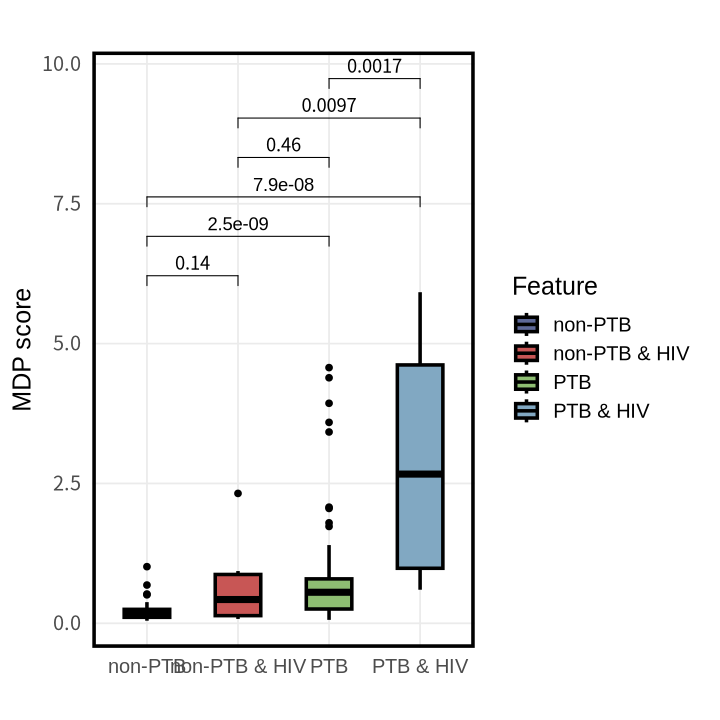

In [12]:
df = data.frame(Feature = MDP_scores$Class, Value = as.numeric(MDP_scores$perturbedgenes.Score))

comparisons = list( c("non-PTB","non-PTB & HIV"),c("non-PTB","PTB"),c("non-PTB","PTB & HIV"),c("non-PTB & HIV","PTB"), c("non-PTB & HIV","PTB & HIV"),c("PTB","PTB & HIV"))
  
p = ggplot(df, aes(x = Feature, y = Value, fill = Feature)) +
  geom_boxplot(notch = FALSE, width = 0.5, color = "black", linewidth = 1) +
  labs(title = "", 
       x = "", 
       y = "MDP score") +
  theme_minimal(base_size = 15) +  
  theme(panel.border = element_rect(color = "black", fill = NA, linewidth = 2),  
        panel.grid.major = element_line(linewidth = 0.5), 
        panel.grid.minor = element_blank()) + 
  scale_fill_manual(values = c("#5d6898", "#c85655", "#8ebe72", "#81a8c2")) +
  stat_compare_means(comparisons = comparisons, method = 'wilcox.test', label = "p.format")

p
ggsave("./Output/06_MDP_scores_box_plot.pdf", plot = p, width = 6, height = 6, dpi = 300)